## NetworkX

In [3]:
V = {1, 2, 3, 4, 5}
E = {(1, 2), (1, 4), (2, 5), (3, 4), (4, 5)}

In [4]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

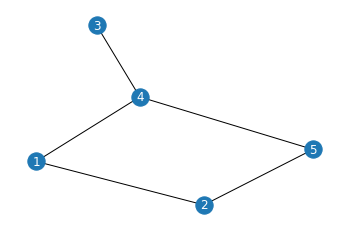

In [5]:
import matplotlib.pyplot as plt

nx.draw_networkx(G, font_color="white")
plt.axis('off');

## Constructing the interactions network

In [8]:
import lxml.etree

In [9]:
NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}


def character_network(tree):
    """Construct a character interaction network.

    Construct a character interaction network for Shakespeare texts in
    the Folger Digital Texts collection. Character interaction networks
    are constructed on the basis of successive speaker turns in the texts,
    and edges between speakers are created when their utterances follow
    one another.

    Arguments:
        tree: An lxml.ElementTree instance representing one of the XML
            files in the Folger Shakespeare collection.

    Returns:
        A character interaction network represented as a weighted,
        undirected NetworkX Graph.

    """
    G = nx.Graph()
    # extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei:div2[@type="scene"]', NSMAP):
        speakers = scene.findall('.//tei:sp', NSMAP)
        # iterate over the sequence of speaker turns...
        for i in range(len(speakers) - 1):
            # ... and extract pairs of adjacent speakers
            try:
                speaker_i = speakers[i].attrib['who'].split('_')[0].replace('#', '')
                speaker_j = speakers[i + 1].attrib['who'].split('_')[0].replace('#', '')
                # if the interaction between two speakers has already
                # been attested, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # else add an edge between speaker i and j to the graph
                else:
                    G.add_edge(speaker_i, speaker_j, weight=1)
            except KeyError:
                continue
    return G

In [10]:
tree = lxml.etree.parse('data/folger/xml/Ham.xml')
G = character_network(tree.getroot())

In [11]:
print(f"N nodes = {G.number_of_nodes()}, N edges = {G.number_of_edges()}")

N nodes = 38, N edges = 73


In [12]:
import collections

interactions = collections.Counter()

for speaker_i, speaker_j, data in G.edges(data=True):
    interaction_count = data['weight']
    interactions[speaker_i] += interaction_count
    interactions[speaker_j] += interaction_count

nodesizes = [interactions[speaker] * 5 for speaker in G]

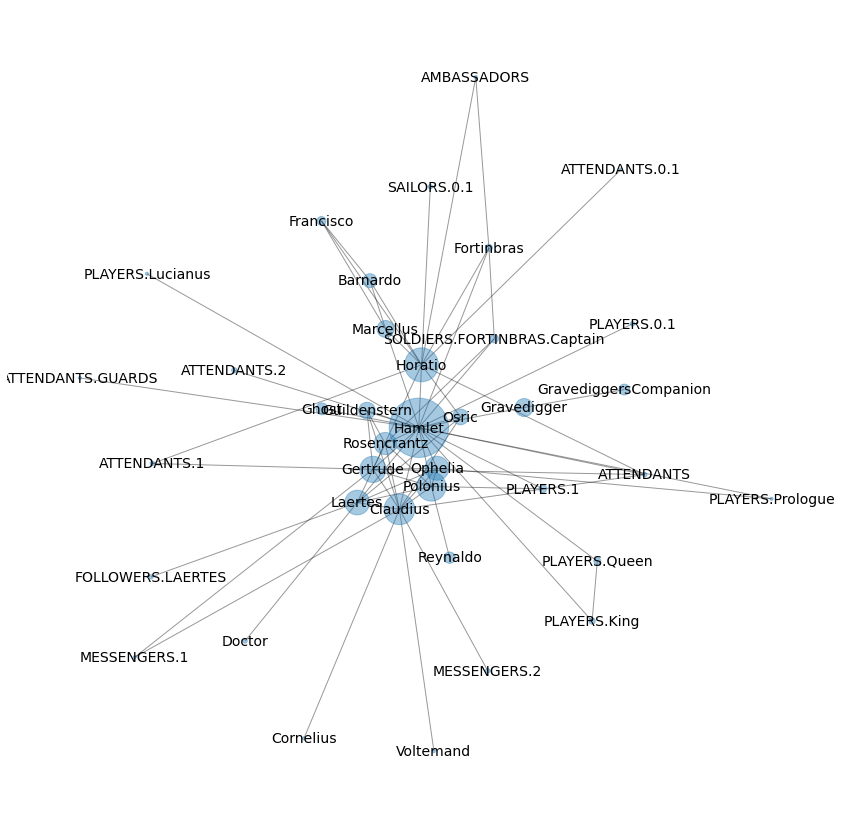

In [13]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G, pos, node_size=nodesizes, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G, pos, font_size=14)
plt.axis('off');

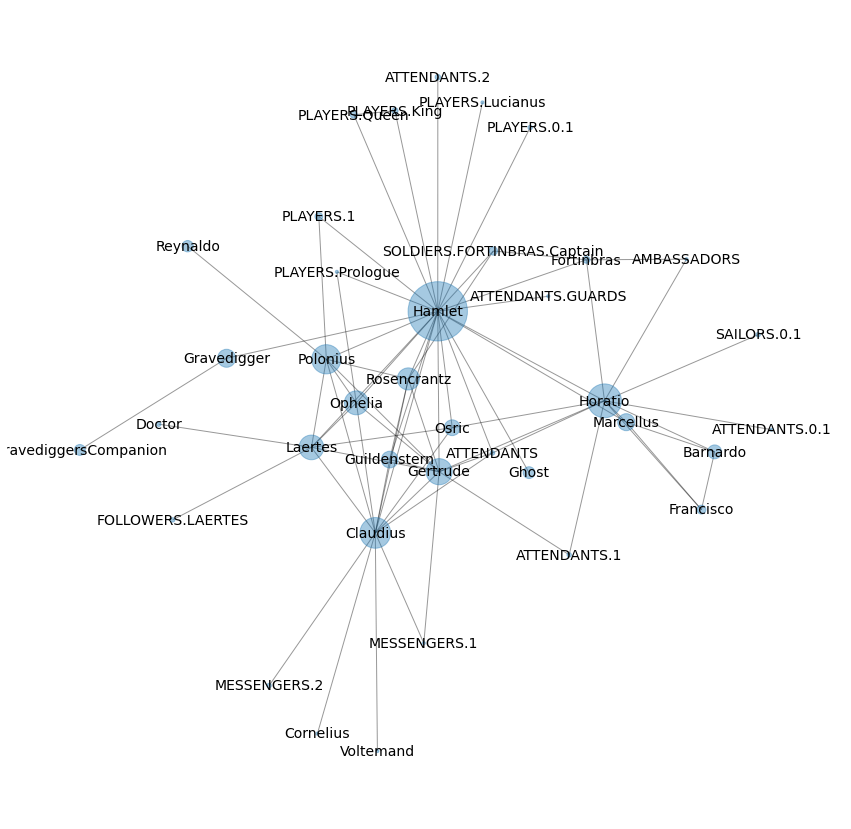

In [14]:
from copy import deepcopy
G0 = deepcopy(G)

for u, v, d in G0.edges(data=True):
    d['weight'] = 1

nodesizes = [interactions[speaker] * 5 for speaker in G0]

fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G0, k=0.5, iterations=200)
nx.draw_networkx_edges(G0, pos, alpha=0.4)
nx.draw_networkx_nodes(G0, pos, node_size=nodesizes, alpha=0.4)
nx.draw_networkx_labels(G0, pos, font_size=14)
plt.axis('off');


## Hamlet-less

In [16]:
G0.remove_node('Hamlet')

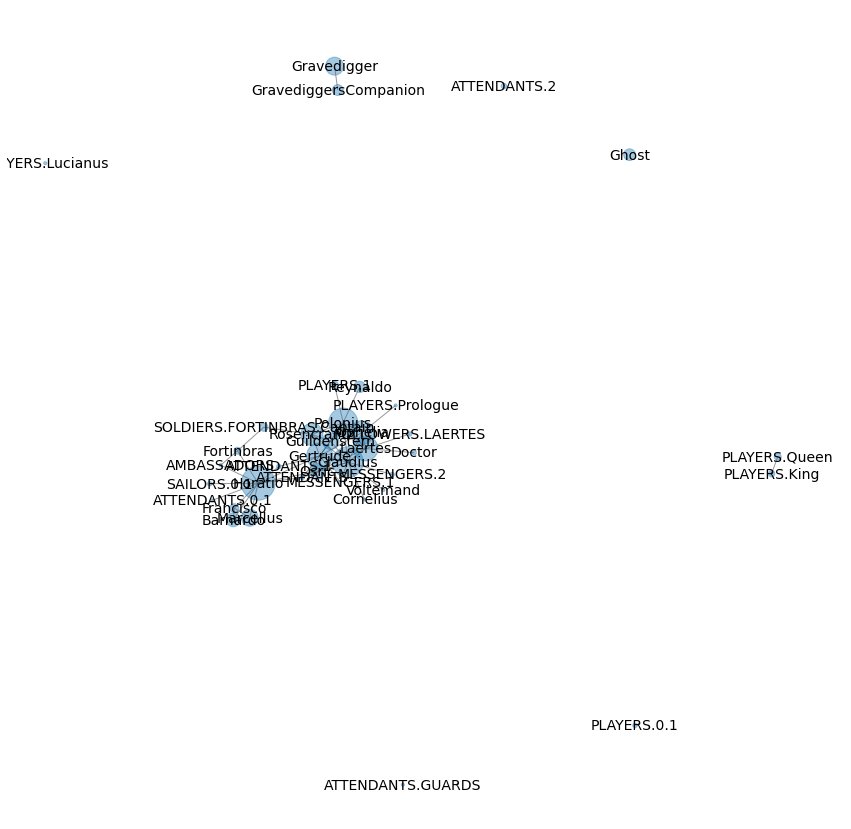

In [17]:
fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G0, k=0.5, iterations=200)
nodesizes = [interactions[speaker] * 5 for speaker in G0]
nx.draw_networkx_edges(G0, pos, alpha=0.4)
nx.draw_networkx_nodes(G0, pos, node_size=nodesizes, alpha=0.4)
nx.draw_networkx_labels(G0, pos, font_size=14)
plt.axis('off');

In [18]:
import json
from networkx.readwrite import json_graph

with open('hamlet.json', 'w') as f:
    json.dump(json_graph.node_link_data(G), f)

with open('hamlet.json') as f:
    d = json.load(f)

G = json_graph.node_link_graph(d)
print(f"Graph with {len(G.nodes())} nodes and {len(G.edges())} edges.")

Graph with 38 nodes and 73 edges.


# Easy Exercice

In [26]:
import csv
from collections import Counter

In [20]:
vondel_path = "data/vondel-stcn.csv"

In [22]:
entries = []
with open(vondel_path) as stream:
    reader = csv.reader(stream, delimiter=',')
    for line in reader:
        print(line)
        break

['year', 'title', 'author', 'publisher']


In [25]:
entries = []
with open(vondel_path) as stream:
    reader = csv.reader(stream, delimiter=',')
    for year, title, author, publisher in reader:
        entries.append([year, title, author, publisher])

In [28]:
publishers_distribution = Counter([publisher for *_, publisher in entries])

In [29]:
publishers_distribution.most_common(5)

[('Wees, Abraham de I, wed. Amsterdam', 34),
 ('Wees, Joannes de Amsterdam', 29),
 ('Oosterwyk, Johannes van Amsterdam', 28),
 ('Brakman, Pieter Amersfoort', 23),
 ('Bruyn, Cornelis de Amsterdam', 21)]

In [30]:
places_distribution = Counter([publisher.split(' ')[-1] for *_, publisher in entries])

In [31]:
places_distribution.most_common(5)

[('Amsterdam', 259),
 ('Amersfoort', 23),
 ('stated', 20),
 ('Köln', 10),
 ('Schiedam', 4)]

# Moderate

In [34]:
tree_rj = lxml.etree.parse('data/folger/xml/Rom.xml')
G_rj = character_network(tree_rj.getroot())

In [37]:
interactions_rj = collections.Counter()

for speaker_i, speaker_j, data in G_rj.edges(data=True):
    interaction_count = data['weight']
    interactions_rj[speaker_i] += interaction_count
    interactions_rj[speaker_j] += interaction_count

for u, v, d in G0.edges(data=True):
    d['weight'] = 1

nodesizes_rj = [interactions_rj[speaker] * 5 for speaker in G_rj]

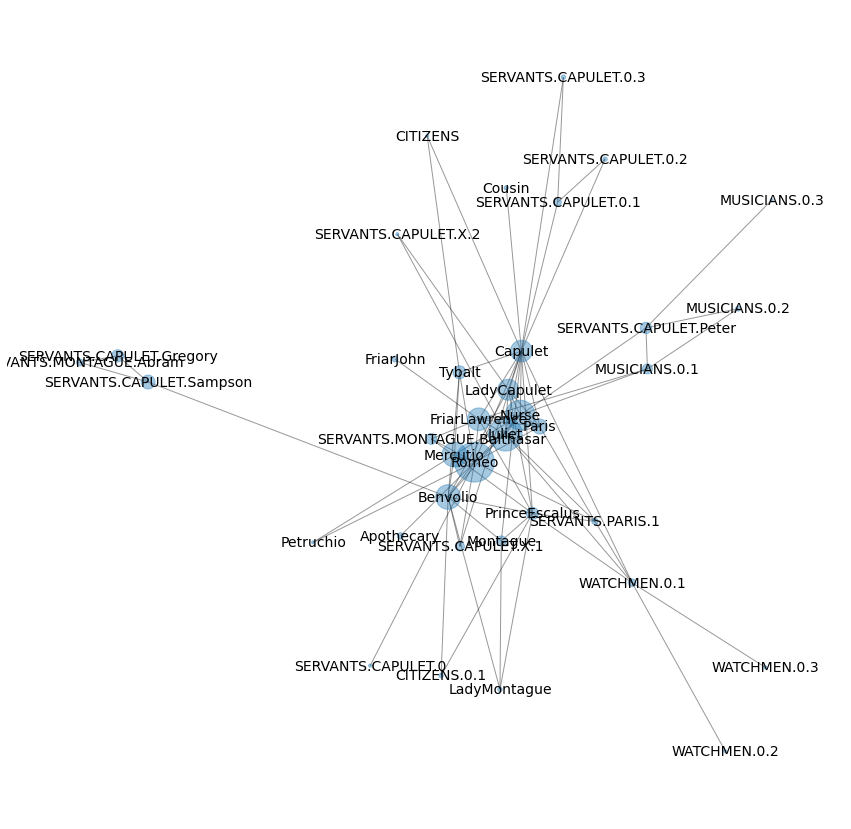

In [38]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G_rj, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G_rj, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G_rj, pos, node_size=nodesizes_rj, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G_rj, pos, font_size=14)
plt.axis('off');

In [46]:
tree_oth = lxml.etree.parse('data/folger/xml/Oth.xml')
G_oth = character_network(tree_oth.getroot())

In [47]:
interactions_oth = collections.Counter()

for speaker_i, speaker_j, data in G_oth.edges(data=True):
    interaction_count = data['weight']
    interactions_oth[speaker_i] += interaction_count
    interactions_oth[speaker_j] += interaction_count

nodesizes_oth = [interactions_oth[speaker] * 5 for speaker in G_oth]

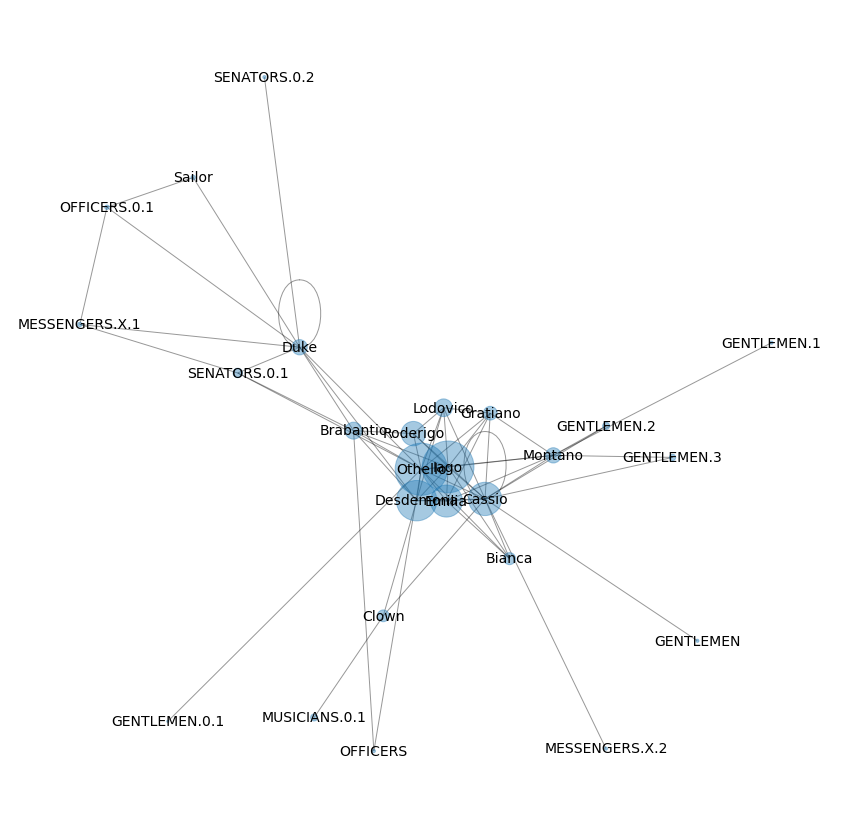

In [48]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G_oth, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G_oth, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G_oth, pos, node_size=nodesizes_oth, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G_oth, pos, font_size=14)
plt.axis('off');

In [52]:
Gs = {"Hamlet": G, "Romeo and Juliet": G_rj, "Othello": G_oth}

In [56]:
for g in Gs:
    print(f"{g}: N nodes = {Gs[g].number_of_nodes()}, N edges = {Gs[g].number_of_edges()}")

Hamlet: N nodes = 38, N edges = 73
Romeo and Juliet: N nodes = 37, N edges = 83
Othello: N nodes = 26, N edges = 64


In [58]:
print(f"Network density")
for g in Gs:
    print(f"   {g}: N nodes = {nx.density(Gs[g])}")

Network density
   Hamlet: N nodes = 0.10384068278805121
   Romeo and Juliet: N nodes = 0.12462462462462462
   Othello: N nodes = 0.19692307692307692


# Challenging

In [60]:
print("List of characters:")
for work, graph in Gs.items():
    print(work, graph.nodes)

List of characters:
Hamlet ['Barnardo', 'Francisco', 'Horatio', 'Marcellus', 'Claudius', 'Cornelius', 'Laertes', 'Polonius', 'Hamlet', 'Gertrude', 'Ophelia', 'Ghost', 'Reynaldo', 'Rosencrantz', 'Guildenstern', 'Voltemand', 'PLAYERS.1', 'PLAYERS.0.1', 'PLAYERS.Prologue', 'PLAYERS.King', 'PLAYERS.Queen', 'PLAYERS.Lucianus', 'ATTENDANTS.GUARDS', 'Fortinbras', 'SOLDIERS.FORTINBRAS.Captain', 'ATTENDANTS.1', 'MESSENGERS.1', 'FOLLOWERS.LAERTES', 'ATTENDANTS.0.1', 'SAILORS.0.1', 'MESSENGERS.2', 'Gravedigger', 'GravediggersCompanion', 'Doctor', 'ATTENDANTS', 'Osric', 'ATTENDANTS.2', 'AMBASSADORS']
Romeo and Juliet ['SERVANTS.CAPULET.Sampson', 'SERVANTS.CAPULET.Gregory', 'SERVANTS.MONTAGUE.Abram', 'Benvolio', 'Tybalt', 'CITIZENS', 'Capulet', 'LadyCapulet', 'Montague', 'LadyMontague', 'PrinceEscalus', 'Romeo', 'Paris', 'SERVANTS.CAPULET.X.1', 'Nurse', 'Juliet', 'SERVANTS.CAPULET.X.2', 'Mercutio', 'SERVANTS.CAPULET.0.1', 'SERVANTS.CAPULET.0.2', 'SERVANTS.CAPULET.0.3', 'Cousin', 'SERVANTS.CAPULET.0

In [65]:
print("Characters with the highest degree:")
for work, graph in Gs.items():
    print(work, ":", max([(character, graph.degree(character)) for character in graph], key=lambda x: x[1]))

Characters with the highest degree:
Hamlet : ('Hamlet', 23)
Romeo and Juliet : ('Capulet', 16)
Othello : ('Cassio', 16)


In [66]:
print("Characters with the highest degree:")
for work, graph in Gs.items():
    print(work, ":", max([(character, graph.degree(character, weight='weight')) for character in graph], key=lambda x: x[1]))

Characters with the highest degree:
Hamlet : ('Hamlet', 704)
Romeo and Juliet : ('Romeo', 318)
Othello : ('Othello', 544)
